In [42]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Create a set of random latitude and logitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [44]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [45]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ed7f2b9881e5ce09b00b900c6320bc5


In [46]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [47]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | berlevag
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | saiha
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | bonavista
Processing Record 9 of Set 1 | san policarpo
Processing Record 10 of Set 1 | port moresby
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | erzurum
Processing Record 18 of Set 1 | vostok
Processing Record 19 of Set 1 | antofagasta
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | the valley
Processing Record 22 of Set 1 | iqaluit
Processing Record 23 of Set 

Processing Record 36 of Set 4 | victoria
Processing Record 37 of Set 4 | kashmor
Processing Record 38 of Set 4 | dharchula
Processing Record 39 of Set 4 | matay
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | pangody
Processing Record 42 of Set 4 | mangai
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | dukat
Processing Record 47 of Set 4 | meyungs
City not found. Skipping...
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | laguna
Processing Record 50 of Set 4 | hofn
Processing Record 1 of Set 5 | port hardy
Processing Record 2 of Set 5 | boa vista
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | baldone
Processing Record 6 of Set 5 | san rafael del sur
Processing Record 7 of Set 5 | abay
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set

Processing Record 25 of Set 8 | opuwo
Processing Record 26 of Set 8 | conceicao do araguaia
Processing Record 27 of Set 8 | skiros
City not found. Skipping...
Processing Record 28 of Set 8 | saint anthony
Processing Record 29 of Set 8 | salalah
Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | ambilobe
Processing Record 32 of Set 8 | yaan
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | roura
Processing Record 35 of Set 8 | tanete
Processing Record 36 of Set 8 | buckingham
Processing Record 37 of Set 8 | puerto baquerizo moreno
Processing Record 38 of Set 8 | raeren
Processing Record 39 of Set 8 | sooke
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | ribeira grande
Processing Record 42 of Set 8 | camacha
Processing Record 43 of Set 8 | mareeba
Processing Record 44 of Set 8 | ferrol
Processing Record 45 of Set 8 | falealupo
City not found. Skipping...
Processing Record 46 of Set 8 | coihaique
Processing Reco

Processing Record 10 of Set 12 | pedro ii
Processing Record 11 of Set 12 | pimentel
Processing Record 12 of Set 12 | saquena
Processing Record 13 of Set 12 | soron
Processing Record 14 of Set 12 | hillsboro
Processing Record 15 of Set 12 | igarka
Processing Record 16 of Set 12 | gedo
Processing Record 17 of Set 12 | ciudad bolivar
Processing Record 18 of Set 12 | ayios matthaios
City not found. Skipping...
Processing Record 19 of Set 12 | launceston
Processing Record 20 of Set 12 | corrales
Processing Record 21 of Set 12 | linxia
Processing Record 22 of Set 12 | dingle
Processing Record 23 of Set 12 | road town
Processing Record 24 of Set 12 | buraydah
Processing Record 25 of Set 12 | fredericksburg
Processing Record 26 of Set 12 | kabompo
Processing Record 27 of Set 12 | mecca
Processing Record 28 of Set 12 | khorixas
Processing Record 29 of Set 12 | altamirano
Processing Record 30 of Set 12 | waipawa
Processing Record 31 of Set 12 | ampanihy
Processing Record 32 of Set 12 | mitzic
Pr

In [48]:
len(city_data)

581

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,75.45,82,53,15.48,PF,2020-06-15 18:20:27
1,Berlevag,70.86,29.09,42.80,87,75,18.34,NO,2020-06-15 18:20:27
2,Bluff,-46.60,168.33,49.01,90,32,9.84,NZ,2020-06-15 18:20:27
3,Busselton,-33.65,115.33,54.00,81,100,5.48,AU,2020-06-15 18:20:28
4,Saiha,22.48,92.97,74.08,94,100,1.72,IN,2020-06-15 18:20:28
5,Tasiilaq,65.61,-37.64,42.80,75,75,11.41,GL,2020-06-15 18:20:28
6,New Norfolk,-42.78,147.06,57.00,78,96,3.00,AU,2020-06-15 18:20:28
7,Bonavista,48.65,-53.11,45.00,79,100,1.99,CA,2020-06-15 18:20:28
8,San Policarpo,12.18,125.51,80.20,75,100,3.38,PH,2020-06-15 18:20:29
9,Port Moresby,-9.44,147.18,77.00,94,40,8.05,PG,2020-06-15 18:20:29


In [50]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-06-15 18:20:27,-23.12,-134.97,75.45,82,53,15.48
1,Berlevag,NO,2020-06-15 18:20:27,70.86,29.09,42.80,87,75,18.34
2,Bluff,NZ,2020-06-15 18:20:27,-46.60,168.33,49.01,90,32,9.84
3,Busselton,AU,2020-06-15 18:20:28,-33.65,115.33,54.00,81,100,5.48
4,Saiha,IN,2020-06-15 18:20:28,22.48,92.97,74.08,94,100,1.72
5,Tasiilaq,GL,2020-06-15 18:20:28,65.61,-37.64,42.80,75,75,11.41
6,New Norfolk,AU,2020-06-15 18:20:28,-42.78,147.06,57.00,78,96,3.00
7,Bonavista,CA,2020-06-15 18:20:28,48.65,-53.11,45.00,79,100,1.99
8,San Policarpo,PH,2020-06-15 18:20:29,12.18,125.51,80.20,75,100,3.38
9,Port Moresby,PG,2020-06-15 18:20:29,-9.44,147.18,77.00,94,40,8.05


In [51]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [53]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592245368.6780992

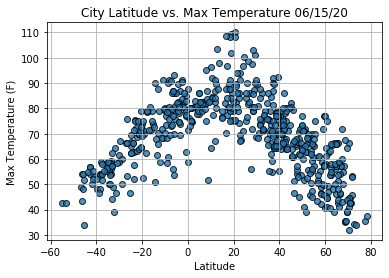

In [54]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

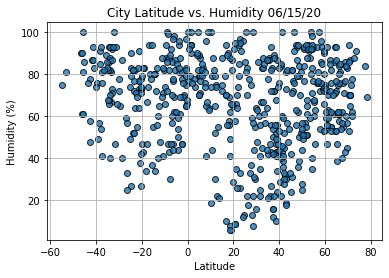

In [55]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

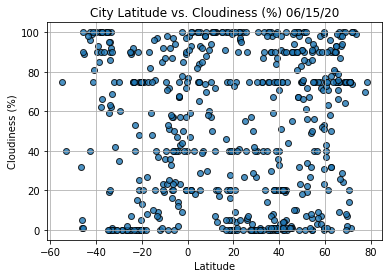

In [56]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

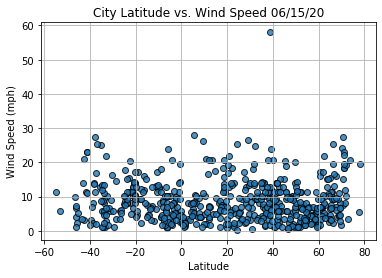

In [57]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [73]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# Plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run the regression on hemisphere weather data.
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [74]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2020-06-15 18:20:30
Lat                         -54.8
Lng                         -68.3
Max Temp                     42.8
Humidity                       75
Cloudiness                     75
Wind Speed                  11.41
Name: 13, dtype: object

In [75]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
576    False
577     True
578     True
579     True
580    False
Name: Lat, Length: 581, dtype: bool

In [76]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Berlevag,NO,2020-06-15 18:20:27,70.86,29.09,42.80,87,75,18.34
4,Saiha,IN,2020-06-15 18:20:28,22.48,92.97,74.08,94,100,1.72
5,Tasiilaq,GL,2020-06-15 18:20:28,65.61,-37.64,42.80,75,75,11.41
7,Bonavista,CA,2020-06-15 18:20:28,48.65,-53.11,45.00,79,100,1.99
8,San Policarpo,PH,2020-06-15 18:20:29,12.18,125.51,80.20,75,100,3.38
...,...,...,...,...,...,...,...,...,...
572,Faya,SA,2020-06-15 18:22:46,18.39,42.45,75.20,41,28,5.82
575,Bellevue,US,2020-06-15 18:19:42,47.61,-122.20,57.20,87,90,9.17
577,Makakilo City,US,2020-06-15 18:20:04,21.35,-158.09,80.60,64,1,4.70
578,Turayf,SA,2020-06-15 18:22:47,31.67,38.66,84.20,25,0,13.87


In [77]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Berlevag,NO,2020-06-15 18:20:27,70.86,29.09,42.80,87,75,18.34
4,Saiha,IN,2020-06-15 18:20:28,22.48,92.97,74.08,94,100,1.72
5,Tasiilaq,GL,2020-06-15 18:20:28,65.61,-37.64,42.80,75,75,11.41
7,Bonavista,CA,2020-06-15 18:20:28,48.65,-53.11,45.00,79,100,1.99
8,San Policarpo,PH,2020-06-15 18:20:29,12.18,125.51,80.20,75,100,3.38
...,...,...,...,...,...,...,...,...,...
572,Faya,SA,2020-06-15 18:22:46,18.39,42.45,75.20,41,28,5.82
575,Bellevue,US,2020-06-15 18:19:42,47.61,-122.20,57.20,87,90,9.17
577,Makakilo City,US,2020-06-15 18:20:04,21.35,-158.09,80.60,64,1,4.70
578,Turayf,SA,2020-06-15 18:22:47,31.67,38.66,84.20,25,0,13.87


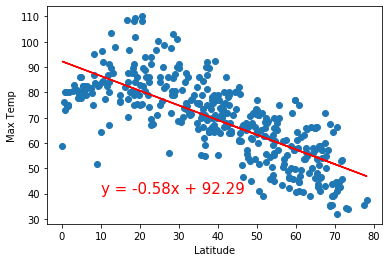

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp",(10,40))

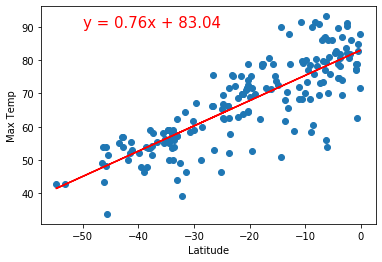

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere /n for Maximum Temperature', 'Max Temp',(-50,90))

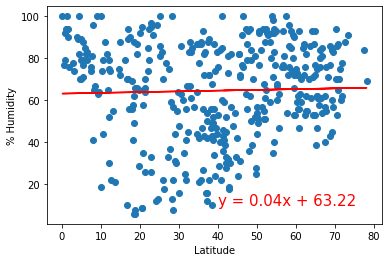

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Humidity", '% Humidity',(40,10))

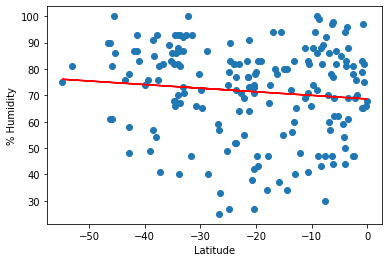

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

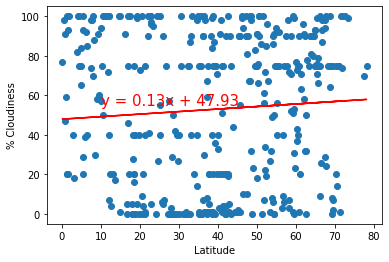

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

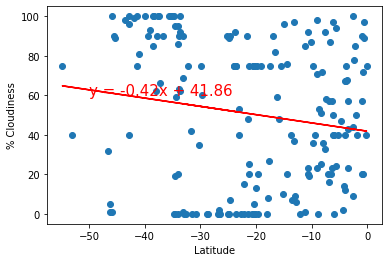

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

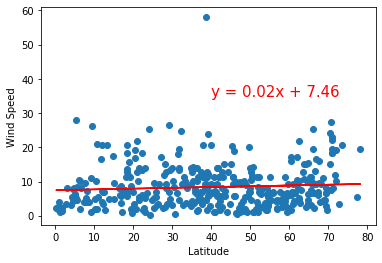

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

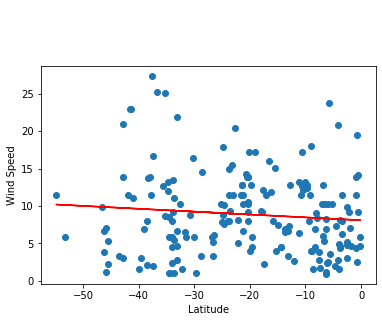

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))